# Crypto Analysis

Analyzing the returns of a basket of cryptocurrencies. 

In [1]:
!pip install yfinance plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import yfinance as yf

Defaulting to user installation because normal site-packages is not writeable


### Retrieve Data

In [121]:
symbols = "BTC-USD ETH-USD SHIB-USD XRP-USD"

cryptos = yf.Tickers(symbols).history(interval='1d', period='90d')['Close']
df = 100 * np.log(1 + cryptos.pct_change()).dropna()

[*********************100%***********************]  4 of 4 completed


### Summary Statistics

In [122]:
df.describe()

,BTC-USD,ETH-USD,SHIB-USD,XRP-USD
count,89.000000,89.000000,89.000000,89.000000
mean,0.008044,-0.102663,-0.247095,0.046476
std,3.513238,4.143581,5.531006,4.534523
min,-10.960468,-15.978661,-16.705407,-12.366021
25%,-1.760339,-2.392531,-4.082193,-2.161526
50%,0.227514,0.491280,0.000000,-0.125952
75%,1.480441,2.105093,3.390150,2.178905
max,13.576426,10.762196,19.671029,19.135285


In [123]:
fig = px.line(df.cumsum(), title='90-Day Return on Cryptos')
fig.update_layout(yaxis_title='Total return (%)', xaxis_title=None, legend_title=None)

### Boxplot

In [124]:
fig = px.box(df, title='Distribution of Weekly Returns')
fig.update_layout(yaxis_title='Daily return (%)', xaxis_title='coin')
fig.show()

### Correlation Matrix

In [125]:
corrmat = df.corr()
round(corrmat, 2)

,BTC-USD,ETH-USD,SHIB-USD,XRP-USD
BTC-USD,1.00,0.90,0.70,0.71
ETH-USD,0.90,1.00,0.72,0.72
SHIB-USD,0.70,0.72,1.00,0.71
XRP-USD,0.71,0.72,0.71,1.00


### Correlation Heatmap

<AxesSubplot:>

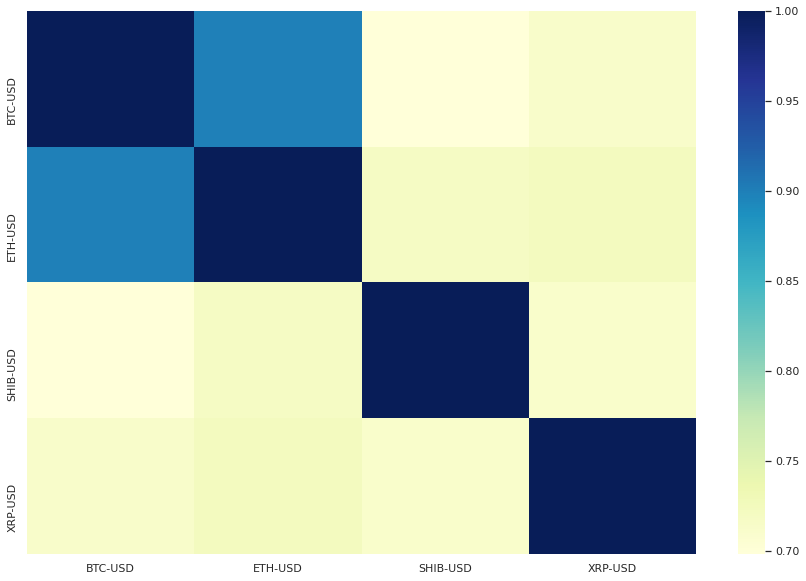

In [126]:
sns.set(rc={"figure.figsize":(15, 10)}) #width=8, height=4
sns.heatmap(corrmat, cmap='YlGnBu')

## Examining Correlations with Other Assets

We examine if any strong correlations exist between cryptos and other assets.

First, get our data.

In [127]:
tickers = "btc-usd eth-usd xrp-usd shib-usd coin-usd ^gspc gc=f"

df = yf.Tickers(tickers).history(interval='1d', period='1y')['Close']
df = df.asfreq("D")
df = 100 * np.log(1 + df.pct_change()).dropna()

[*********************100%***********************]  7 of 7 completed


In [128]:
df.describe()

,BTC-USD,COIN-USD,ETH-USD,GC=F,SHIB-USD,XRP-USD,^GSPC
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,-0.074677,-0.483715,0.095679,0.024908,0.952866,-0.166140,0.023489
std,3.926680,8.785533,5.183791,0.763009,17.359676,6.222693,0.786507
min,-14.810708,-57.470147,-31.745903,-4.718347,-69.314718,-39.624444,-2.996259
25%,-2.223274,-4.398681,-2.419589,-0.165430,-4.082193,-2.883608,-0.183502
50%,0.031287,-0.477543,0.435623,0.000000,0.000000,-0.049646,0.000000
75%,2.120119,2.906295,3.027754,0.307909,3.007917,2.736130,0.282620
max,13.576426,41.532640,22.564945,2.290628,167.397640,28.197290,2.537360


In [129]:
round(df.corr(),2)

,BTC-USD,COIN-USD,ETH-USD,GC=F,SHIB-USD,XRP-USD,^GSPC
BTC-USD,1.00,0.50,0.82,-0.06,0.33,0.75,0.29
COIN-USD,0.50,1.00,0.66,-0.07,0.23,0.49,0.18
ETH-USD,0.82,0.66,1.00,0.00,0.33,0.75,0.30
GC=F,-0.06,-0.07,0.00,1.00,-0.05,-0.01,-0.12
SHIB-USD,0.33,0.23,0.33,-0.05,1.00,0.22,0.02
XRP-USD,0.75,0.49,0.75,-0.01,0.22,1.00,0.22
^GSPC,0.29,0.18,0.30,-0.12,0.02,0.22,1.00


<AxesSubplot:>

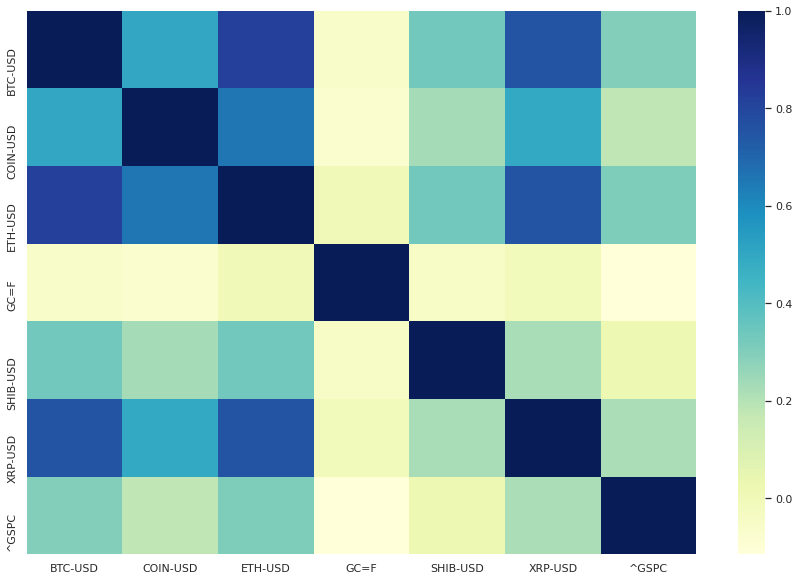

In [130]:
sns.heatmap(df.corr(), cmap='YlGnBu')